# Анализ данных | Python 
## ОП «Журналистика», ОП «Медиакоммуникации» 2022/23

## Семинар 4 

## Генеральная совокупность и выборка. Частотные таблицы и распределения

*Автор: Татьяна Рогович*

In [1]:
import pandas as pd # импортировали библиотеку pandas и назвали ее pd 
data = pd.read_csv('https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/titanic.csv')

Помимо фяильтрации и сортировки, данные можно группировать:

In [2]:
data.groupby('Sex') # разбиение всех объектов на 2 группы по полу - возращает просто сгруппированый датафрейм

In [3]:
data.groupby('Sex')['Pclass'].value_counts() # группируем по полу и считаем для каждого пассажирова разных классов

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [4]:
data.groupby('Sex')['Age'].mean() # средний возраст для пассажиров каждого из полов

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Смотреть на числа и таблицы не очень удобно - построим графики!

<AxesSubplot:>

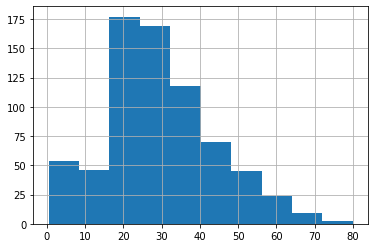

In [5]:
data['Age'].hist() # гистограмма распределения возраста среди пассажиров

<AxesSubplot:>

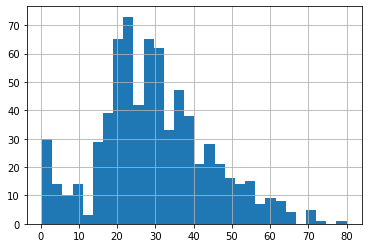

In [6]:
data['Age'].hist(bins = 30) # увеличили кол-во столбцов (бинов)

<AxesSubplot:>

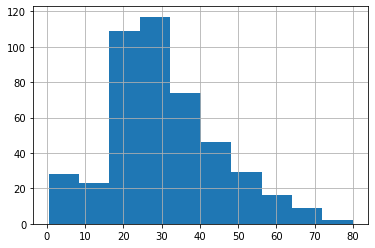

In [7]:
data[data.Sex == 'male']['Age'].hist()  #гистограмма распределения возраста среди мужчин

Построим столбчатую диаграмму для признака "класс пассажира":

1) Сгруппируем все данные по признаку `Pclass` - `data.groupby('Pclass')` и посчитаем количество в каждой из групп - `.size()`

In [8]:
data.groupby('Pclass').size() 

Pclass
1    216
2    184
3    491
dtype: int64

2) На полученных данных построим диаграмму:

<AxesSubplot:xlabel='Pclass'>

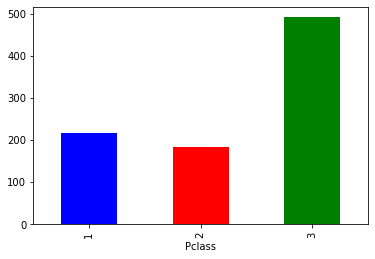

In [11]:
data.groupby('Pclass').size().plot(kind = 'bar', color = ['blue', 'red', 'green'])

<AxesSubplot:title={'center':'Passenger classes'}, ylabel='None'>

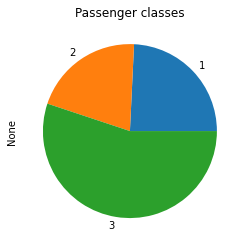

In [12]:
data.groupby('Pclass').size().plot(kind = 'pie', title = 'Passenger classes')

Можно делать и чуть более сложные графики. Давйте посмотрим на распределение выживших среди мужчин и женщин.

<AxesSubplot:xlabel='Survived,Sex'>

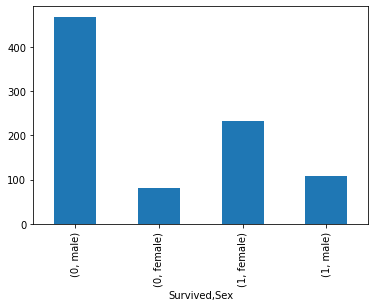

In [13]:
data.groupby(['Survived'])['Sex'].value_counts().plot(kind = 'bar')

Так мы видим разбивку, но хотелось бы получить составные столбики. Для этого выполним метод `.unstack()`, который преобразует датафрейм.

In [14]:
data.groupby(['Survived'])['Sex'].value_counts() # без unstack

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [15]:
data.groupby(['Survived'])['Sex'].value_counts().unstack() 
# с unstack. Обратите внимание, как изменилась структура датафрема.

Sex,female,male
Survived,,
0,81,468
1,233,109


А вот его мы уже можем визуализировать. 

<AxesSubplot:xlabel='Survived'>

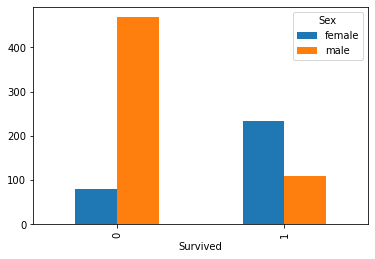

In [16]:
data.groupby(['Survived'])['Sex'].value_counts().unstack().plot(kind = 'bar')

Уже лучше. А еще можно добавить дополнительный параметр в метод `.plot()` и станет совсем хорошо.

<AxesSubplot:xlabel='Survived'>

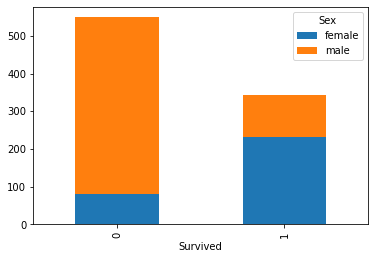

In [17]:
data.groupby(['Survived'])['Sex'].value_counts().unstack().plot(kind='bar', stacked = True)

### Дополнительно про распределения

Обычно, когда говорят о распределении, представляют сглаженную линию, под которой могли бы находиться все наши данные. Такой график уже показывает нам не сколько раз встречается каждое значение, а какую долю распределения такие значения составляют.

Давайте импортируем библиотеку для визуализаций `seaborn`, которая поможет нам построить такой график.

/Users/anastasiaparsina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

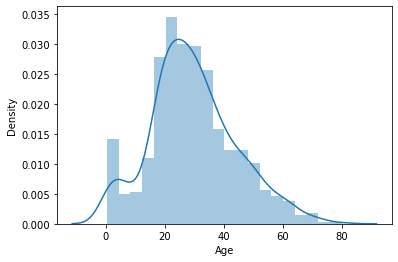

In [18]:
import seaborn as sns  # импортируем библиотеку под именем sns

sns.distplot(data['Age'].dropna())  
# применяем функцию, которая строит график распределения из библиотеки seaborn к нашим данным. 
# методом .dropna() опускаем ячейки с пропущенными значениями - иначе seaborn сломается.

В идеальном мире многие вещи распределены нормально (например, вес и рост людей). Это значит, что такое распределение имеет определенные параметры (не будем их обсуждать в этом курсе) и выглядит как колокол (а вот это можно и запомнить). 

Для некоторых моделей в статистике мы можем применять только переменные, которые распределены нормально. Давайте посмотрим, как распределен возраст пассажиров относительно нормального распределения. Для этого импортируем функцию, которая задает нормальное распределение.

/Users/anastasiaparsina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

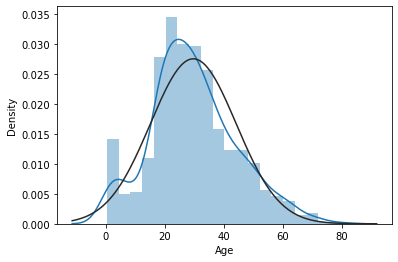

In [19]:
# из пакета для работы со статистическими данными и моделями импортируем команду, которая задает нормальное распределение
from scipy.stats import norm

sns.distplot(data.Age.dropna(), fit=norm)  
# параметр fit строит нам еще один график поверх существующего, 
# сейчас мы просим его построить нормальное распределение 